In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['patch.force_edgecolor']=True

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

movies.columns = (['Film','Genre','CriticsRatings','AudienceRatings',
                  'BudgetMillions','Year'])
movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticsRatings   559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   BudgetMillions   559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [5]:
movies['Genre'] = movies.Genre.astype('category')
movies['Year'] = movies.Year.astype('category')

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    object  
 1   Genre            559 non-null    category
 2   CriticsRatings   559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(2), int64(3), object(1)
memory usage: 19.2+ KB


# Violin Plot

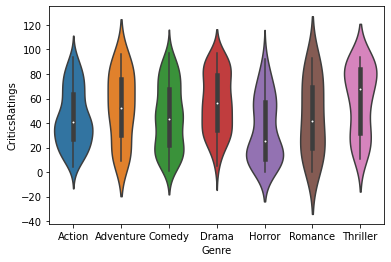

In [7]:
v = sns.violinplot(data=movies,x='Genre' , y='CriticsRatings')

# Boxplot

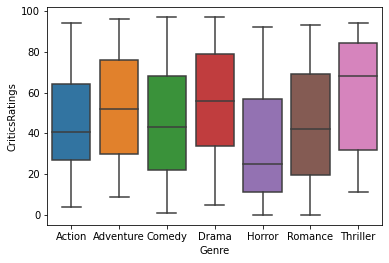

In [8]:
b = sns.boxplot(data=movies,x='Genre' , y='CriticsRatings')

# Subplot

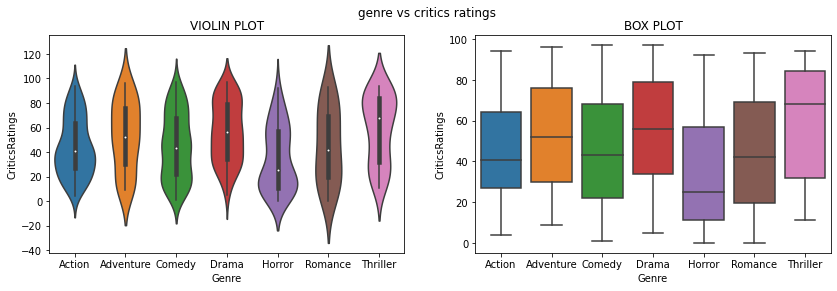

In [15]:
fig,axis=plt.subplots(1,2,figsize=(14,4))
v = sns.violinplot(data=movies,x='Genre' , y='CriticsRatings',ax=axis[0])
b = sns.boxplot(data=movies,x='Genre' , y='CriticsRatings',ax=axis[1])
axis[0].set_title('VIOLIN PLOT')
axis[1].set_title('BOX PLOT')
fig.suptitle("genre vs critics ratings")
plt.show()

# DashBoard

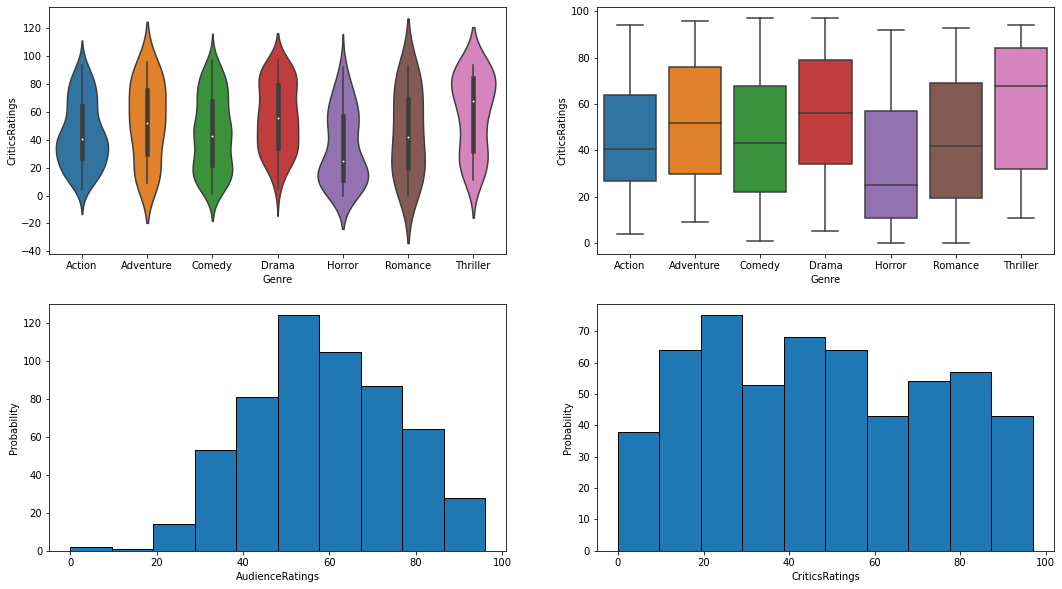

In [19]:
fig,axis=plt.subplots(2,2,figsize=(18,10))
v = sns.violinplot(data=movies,x='Genre' , y='CriticsRatings',ax=axis[0,0])
b = sns.boxplot(data=movies,x='Genre' , y='CriticsRatings',ax=axis[0,1])
axis[1,0].hist(movies.AudienceRatings)
axis[1,1].hist(movies.CriticsRatings)

axis[1,0].set_xlabel('AudienceRatings')
axis[1,1].set_xlabel('CriticsRatings')

axis[1,0].set_ylabel('Probability')
axis[1,1].set_ylabel('Probability')
plt.show()

# FacetGrid

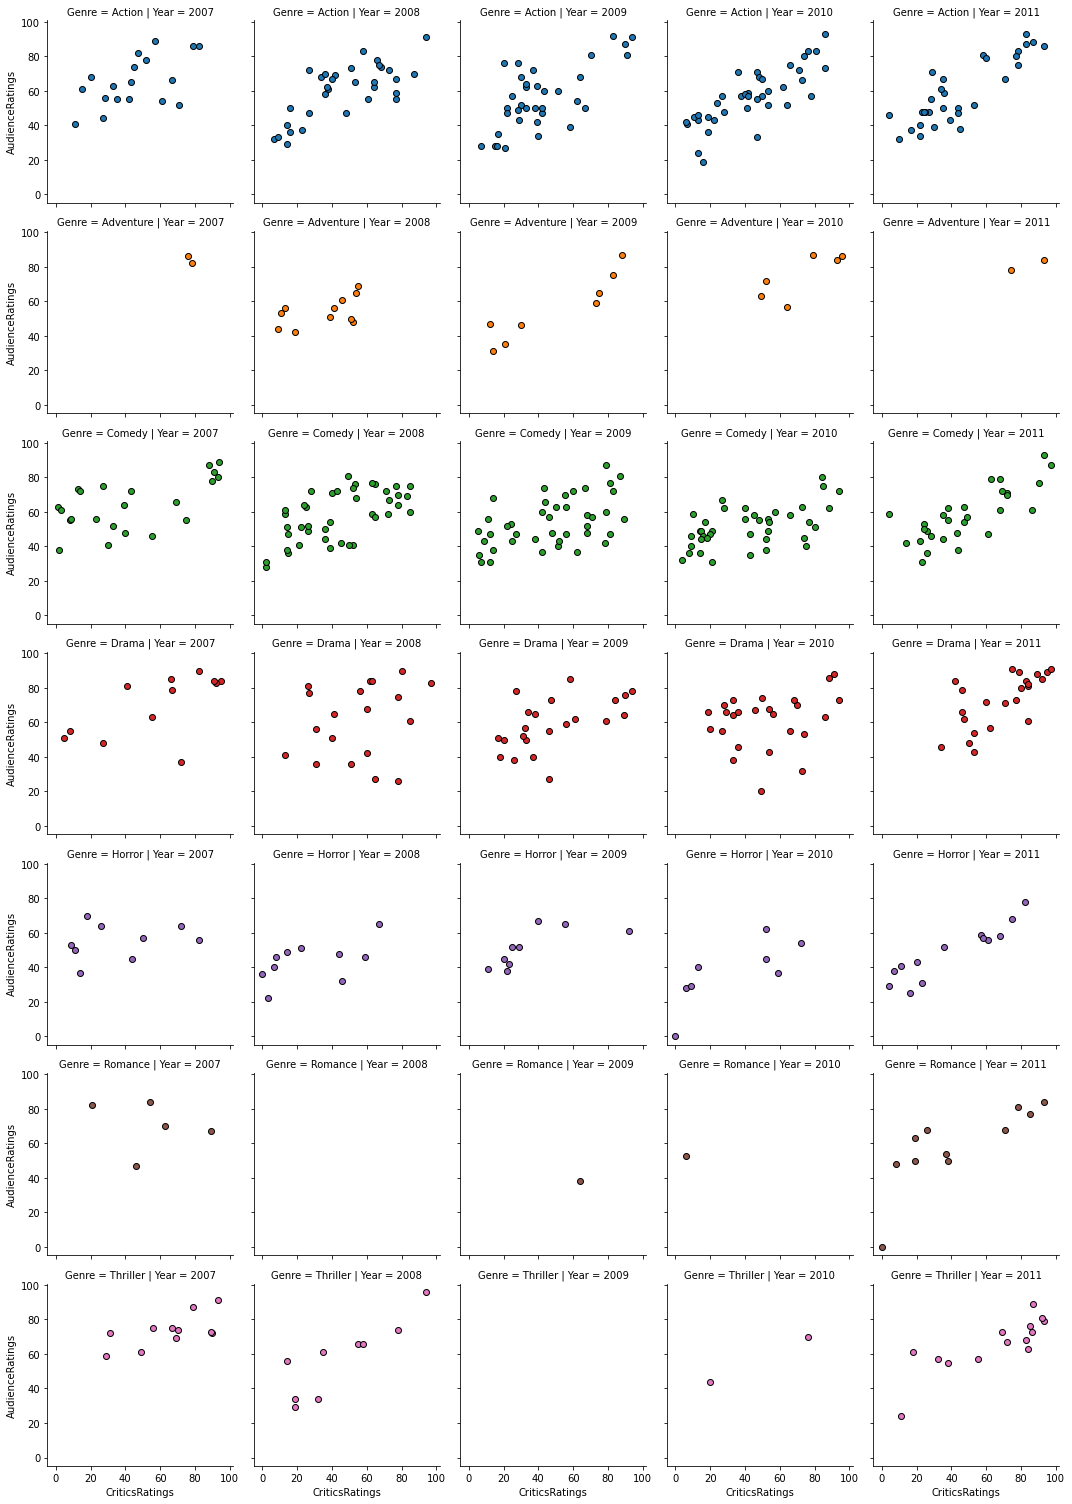

In [20]:
g = sns.FacetGrid(movies, row='Genre',col='Year',hue='Genre')
kws = dict(edgecolor="black")
g = g.map(plt.scatter, 'CriticsRatings','AudienceRatings',**kws)